# Genome Assembly 2
**Assembling Complex Genomes: Short Reads vs. Long Reads**


Xanthomonas genomes are known for their complexity, characterized by numerous repeat elements and TAL effectors with highly repetitive sequences. These features pose significant challenges for genome assembly, requiring careful consideration of the sequencing technology and assembly methods used.

In this section, we will first assemble a Xanthomonas bacterial genome using Illumina short-read sequences. Short reads often struggle with repetitive regions, which can lead to fragmented assemblies. To address this, we will then perform a long-read assembly, which has the potential to resolve these repetitive elements more effectively.

By comparing the strengths and weaknesses of these two sequencing methods, we aim to evaluate their performance in assembling the challenging Xanthomonas genome.

##Install dependencies and tools##

**Install miniconda**

In [1]:
# @title
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!conda config --add channels defaults
!conda config --add channels bioconda
!conda config --add channels conda-forge

--2025-11-13 23:28:16--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157891003 (151M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 150.58M   155MB/s    in 1.0s    

2025-11-13 23:28:17 (155 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [157891003/157891003]

PREFIX=/usr/local
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please 

In [2]:
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r

accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r


**Install fastqc, trim_galore, spades, Nanoplot, filtlong, and checkM**

In [3]:
# @title
!conda install -c conda-forge ncbi-datasets-cli -y
!conda install bioconda::nanoplot -y
!conda install -c bioconda filtlong -y
!conda install bioconda::flye -y
!conda install -c bioconda quast -y
!conda install bioconda::pysradb -y

Jupyter detected...
2 channel Terms of Service accepted
Retrieving notices: - \ | done
Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ncbi-datasets-cli


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    ncbi-datasets-cli-18.9.0   |       ha770c72_0        16.1 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        19.4 MB

The following NEW packages will be INSTALLED:

  ncbi-datasets-cli  conda-forge/linux-64::ncbi-datasets-cli-18

In [4]:
!apt-get update -qq
!apt-get install -y fastqc

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra gsettings-desktop-schemas libapache-pom-java
  libargs4j-java libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libcommons-compress-java libcommons-io-java libcommons-jexl2-java
  libcommons-lang3-java libcommons-logging-java libcommons-math3-java
  libcommons-parent-java libfindbin-libs-perl libhtsjdk-java libjbzip2-java
  libjson-simple-java libngs-java libngs-sdk-dev libngs-sdk2 libsis-base-java
  libsis-base-jni libsis-jhdf5-java libsis-jhdf5-jni libsnappy-java
  libsnappy-jni libxcomposite1 libxtst6 libxxf

# Short reads assembly

Fetch illumina sequences and Run spades

In [5]:
!pysradb search --title "Xanthomonas oryzae pv. oryzae"

100% 20/20 [00:00<00:00, 43.27it/s]
study_accession	experiment_accession	experiment_title	sample_taxon_id	sample_scientific_name	experiment_library_strategy	experiment_library_source	experiment_library_selection	sample_accession	sample_alias	experiment_instrument_model	pool_member_spots	run_1_size	run_1_accession	run_1_total_spots	run_1_total_bases
SRP587187	SRX28902218	ONT genome sequence of Xanthomonas oryzae pv. oryzae GXB1-2	64187	Xanthomonas oryzae pv. oryzae	WGS	GENOMIC	RANDOM	SRS25127868	GXB1-2	PromethION	458467	1670829401	SRR33675775	458467	1971227135
SRP586506	SRX28864937	ONT genome sequence of Xanthomonas oryzae pv. oryzae GX2-3	64187	Xanthomonas oryzae pv. oryzae	WGS	GENOMIC	RANDOM	SRS25092550	GX2-3	PromethION	461765	2137502771	SRR33637121	461765	2534201865
SRP586495	SRX28864014	ONT genome sequence of Xanthomonas oryzae pv. oryzae JS1	64187	Xanthomonas oryzae pv. oryzae	WGS	GENOMIC	RANDOM	SRS25091742	JS1	PromethION	893883	3381025240	SRR33636198	893883	3993690750
SRP575888	SR

In [6]:
!wget https://zenodo.org/record/14018699/files/SRR30576374_1.fastq.gz
!wget https://zenodo.org/record/14018699/files/SRR30576374_2.fastq.gz

--2025-11-13 23:35:59--  https://zenodo.org/record/14018699/files/SRR30576374_1.fastq.gz
Resolving zenodo.org (zenodo.org)... 188.185.43.153, 188.185.48.75, 137.138.52.235, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.153|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/14018699/files/SRR30576374_1.fastq.gz [following]
--2025-11-13 23:36:00--  https://zenodo.org/records/14018699/files/SRR30576374_1.fastq.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 193590461 (185M) [application/octet-stream]
Saving to: ‘SRR30576374_1.fastq.gz’

SRR30576374_1.fastq 100%[===================>] 184.62M  16.4MB/s    in 12s     

2025-11-13 23:36:13 (14.9 MB/s) - ‘SRR30576374_1.fastq.gz’ saved [193590461/193590461]

--2025-11-13 23:36:13--  https://zenodo.org/record/14018699/files/SRR30576374_2.fastq.gz
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
C

Run quality control for the illumina reads

In [7]:
!fastqc SRR30576374_1.fastq.gz
!fastqc SRR30576374_2.fastq.gz

Started analysis of SRR30576374_1.fastq.gz
Approx 5% complete for SRR30576374_1.fastq.gz
Approx 10% complete for SRR30576374_1.fastq.gz
Approx 15% complete for SRR30576374_1.fastq.gz
Approx 20% complete for SRR30576374_1.fastq.gz
Approx 25% complete for SRR30576374_1.fastq.gz
Approx 30% complete for SRR30576374_1.fastq.gz
Approx 35% complete for SRR30576374_1.fastq.gz
Approx 40% complete for SRR30576374_1.fastq.gz
Approx 45% complete for SRR30576374_1.fastq.gz
Approx 50% complete for SRR30576374_1.fastq.gz
Approx 55% complete for SRR30576374_1.fastq.gz
Approx 60% complete for SRR30576374_1.fastq.gz
Approx 65% complete for SRR30576374_1.fastq.gz
Approx 70% complete for SRR30576374_1.fastq.gz
Approx 75% complete for SRR30576374_1.fastq.gz
Approx 80% complete for SRR30576374_1.fastq.gz
Approx 85% complete for SRR30576374_1.fastq.gz
Approx 90% complete for SRR30576374_1.fastq.gz
Approx 95% complete for SRR30576374_1.fastq.gz
Analysis complete for SRR30576374_1.fastq.gz
Started analysis of 

Enter the name of the HTML file you want to display (include .html extension): SRR30576374_1_fastqc.html


Measure,Value
Filename,SRR30576374_1.fastq.gz
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,2578665
Sequences flagged as poor quality,0
Sequence length,35-151
%GC,63

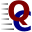
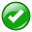
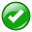
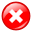
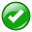
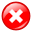
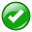
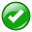
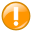
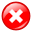
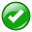
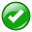
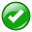
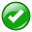
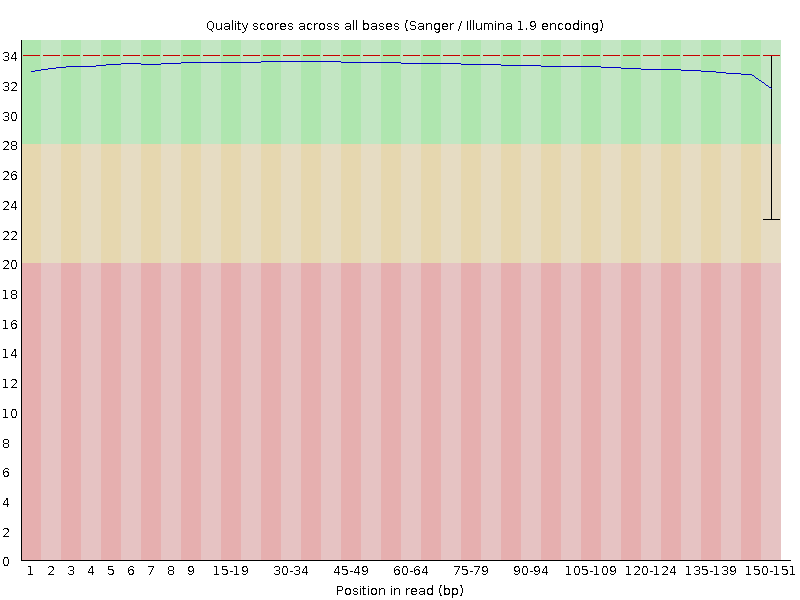
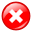
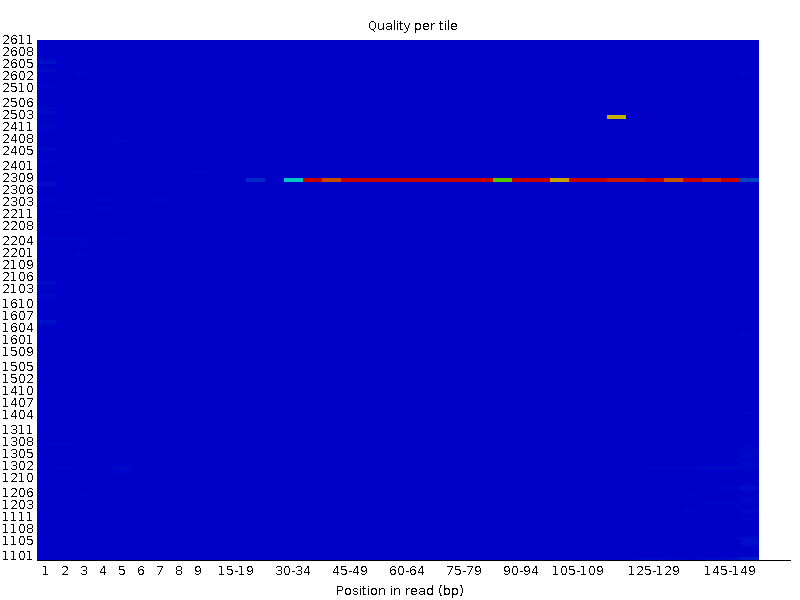
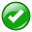
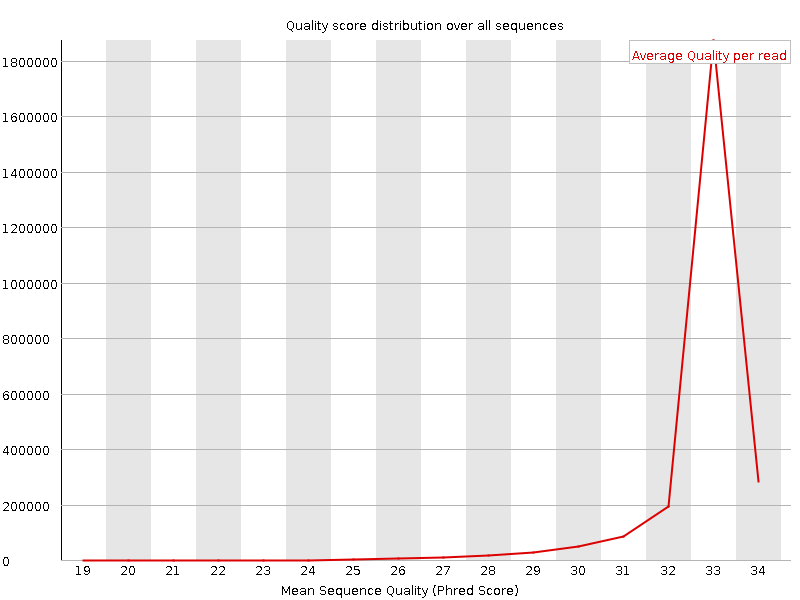
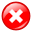
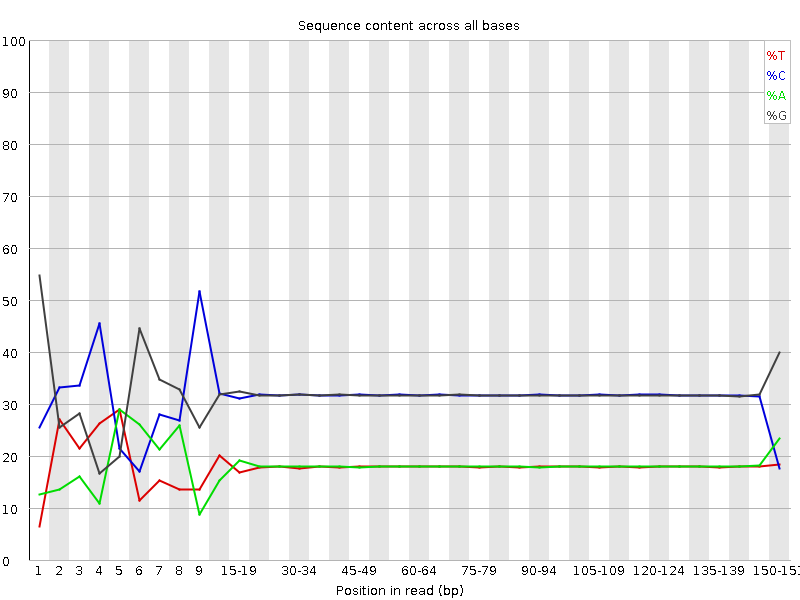
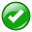
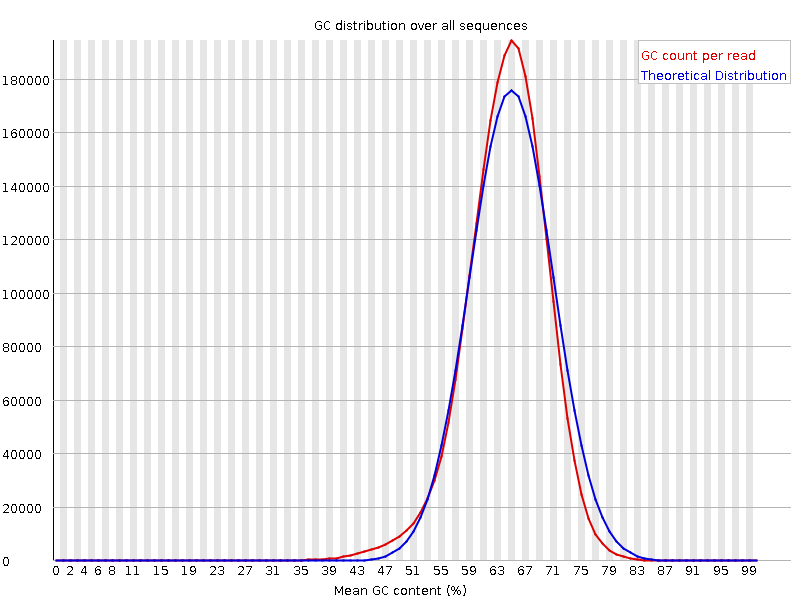
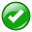
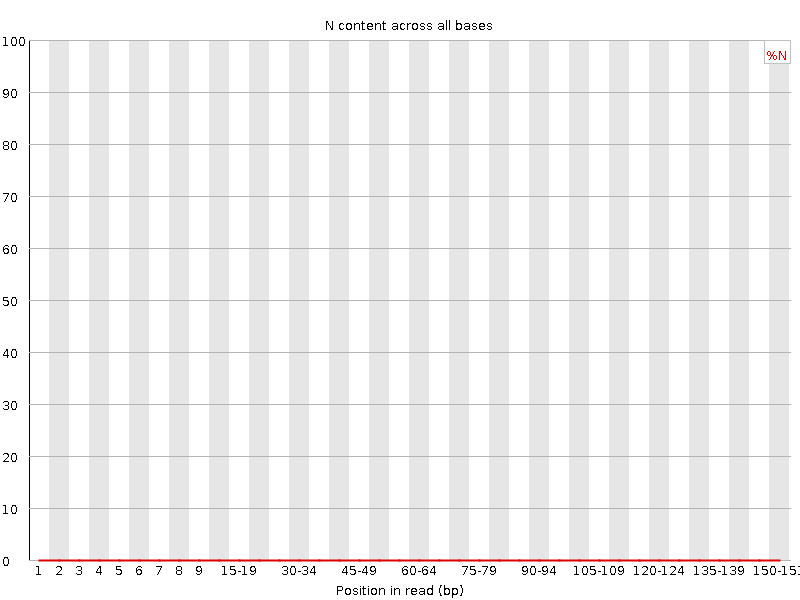
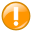
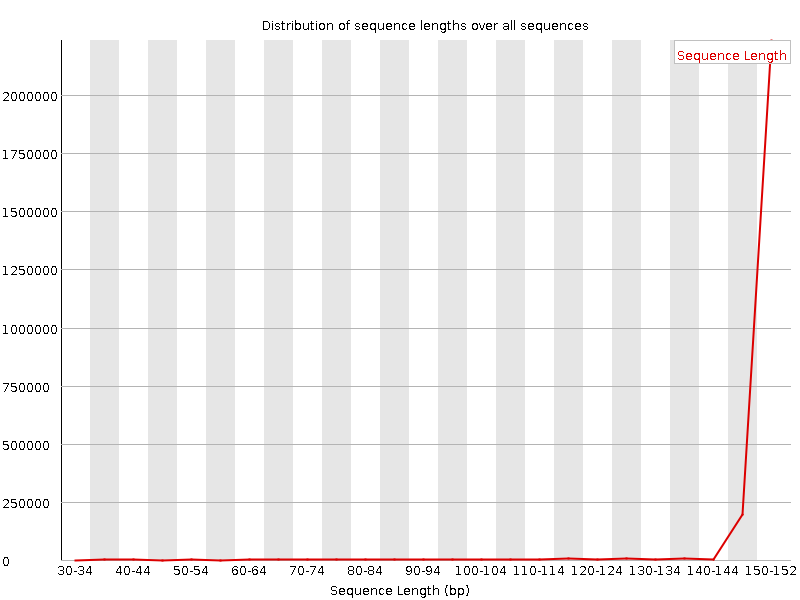
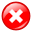
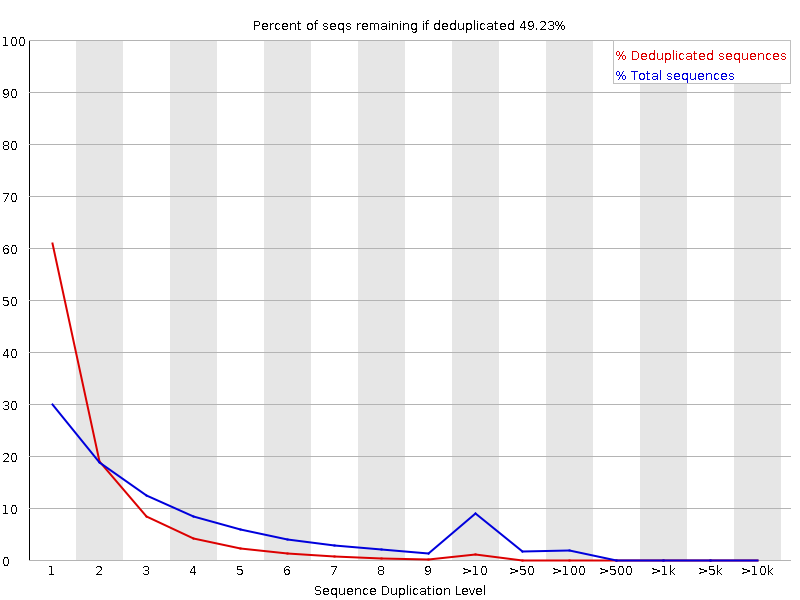
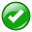
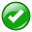
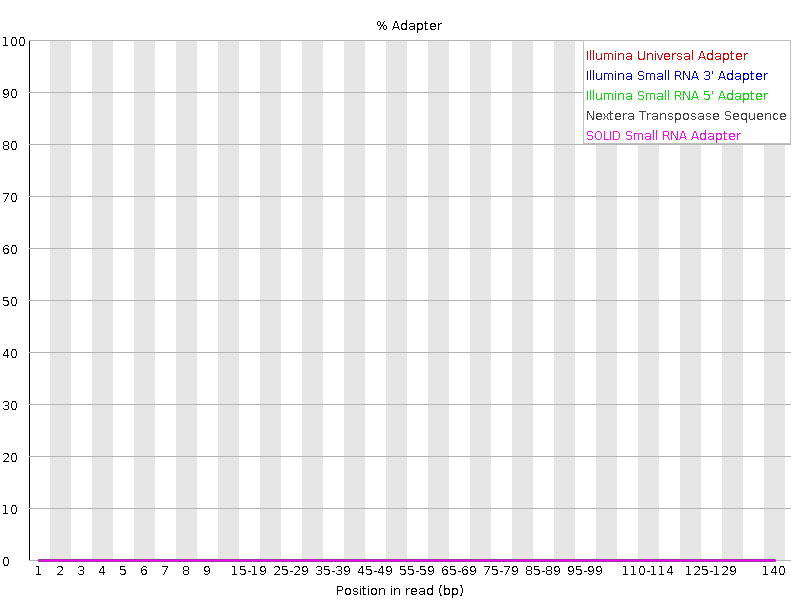

In [9]:
import os
from IPython.core.display import display, HTML

# Ask the user for the file name they want to display
file_name = input("Enter the name of the HTML file you want to display (include .html extension): ")

# Check if the file exists
if os.path.exists(file_name):
    # Open and read the HTML file
    with open(file_name, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))  # Display the HTML content
else:
    print(f"File '{file_name}' not found. Please ensure the file exists in the current directory.")


In [ ]:
%%bash
# 1️⃣  Install micromamba (lightweight conda)
wget -qO- https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba > /dev/null

# 2️⃣  Initialize the shell
eval "$(./bin/micromamba shell hook -s bash)"

# 3️⃣  Create an isolated environment (Python 3.12 avoids cutadapt conflict)
micromamba create -y -n tg -c conda-forge -c bioconda python=3.12 trim-galore cutadapt fastqc

# 4️⃣  Confirm installation
micromamba run -n tg trim_galore --version
micromamba run -n tg cutadapt --version


**Filter and Clip Sequences**

Filter and trim sequences based on a Phred score greater than 20, removing adapters and considering nucleotide composition.

In [ ]:
%%bash
# Activate micromamba shell
eval "$(./bin/micromamba shell hook -s bash)"
micromamba run -n tg trim_galore --paired --clip_R1 15 --clip_R2 15 --three_prime_clip_R1 10 --three_prime_clip_R2 10 --fastqc SRR30576374_1.fastq.gz SRR30576374_2.fastq.gz
# Run Trim Galore on a test file (change names as needed)
#micromamba run -n tg trim_galore --help
# Example real run:
# micromamba run -n tg trim_galore -q 20 --fastqc reads.fastq -o output_dir

In [ ]:
#!trim_galore --paired --clip_R1 15 --clip_R2 15 --three_prime_clip_R1 10 --three_prime_clip_R2 10 --fastqc SRR30576374_1.fastq.gz SRR30576374_2.fastq.gz

Enter the name of the HTML file you want to display (include .html extension): SRR30576374_1_val_1_fastqc.html


Measure,Value
Filename,SRR30576374_1_val_1.fq.gz
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,2563964
Total Bases,314.3 Mbp
Sequences flagged as poor quality,0
Sequence length,20-126
%GC,63

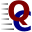
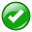
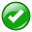
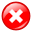
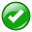
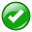
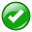
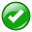
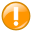
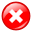
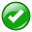
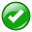
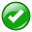
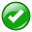
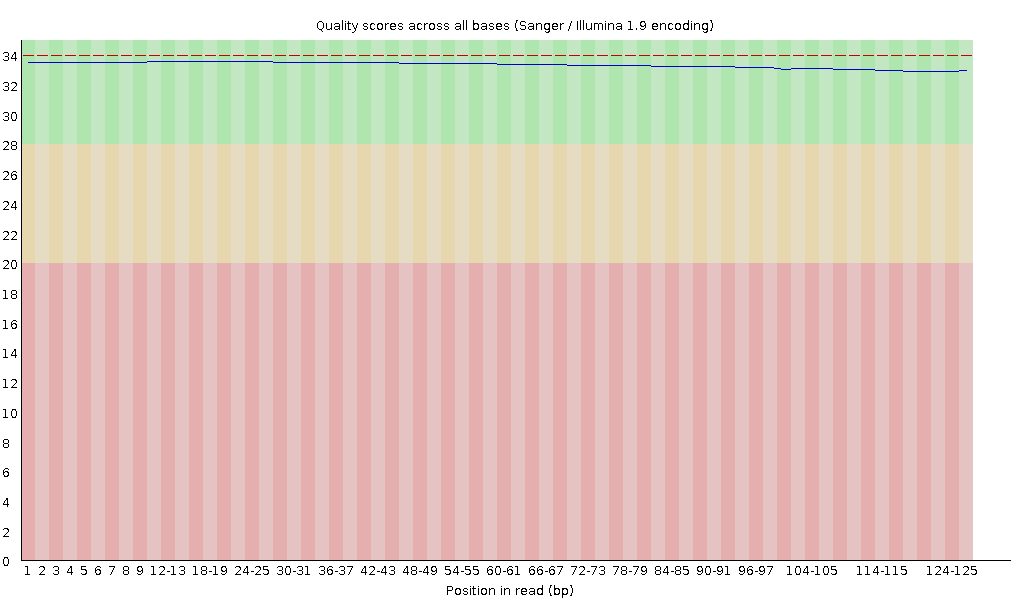
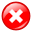
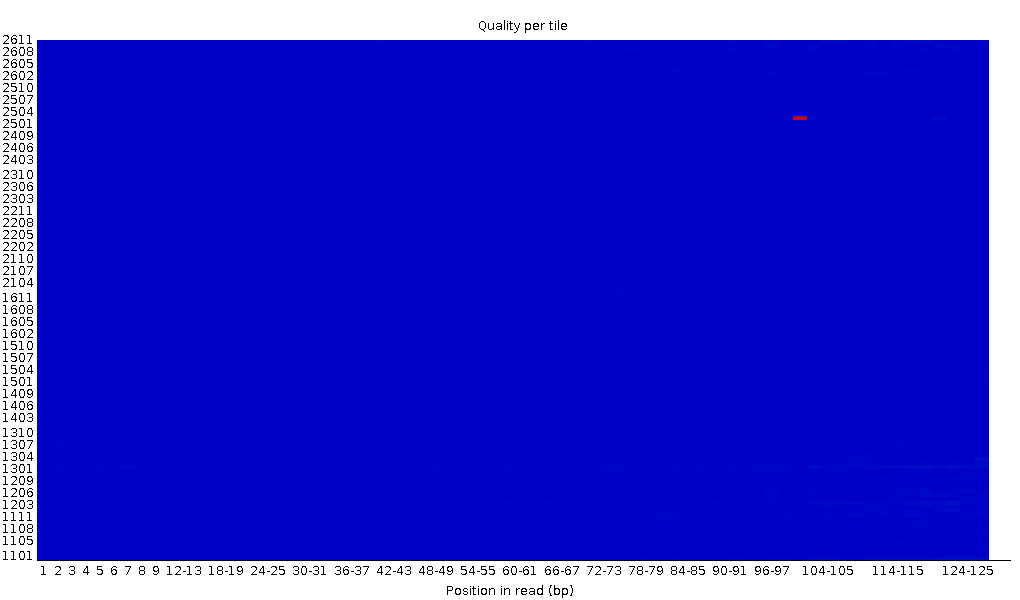
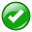
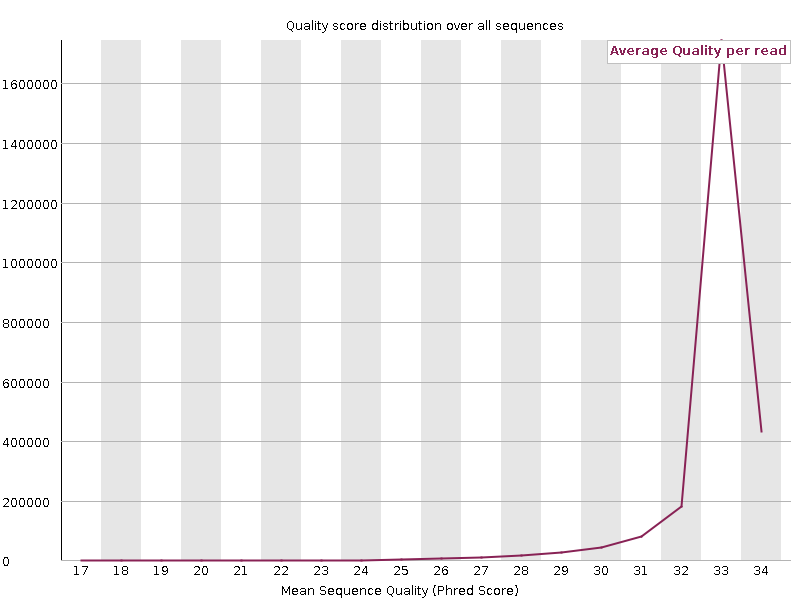
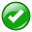
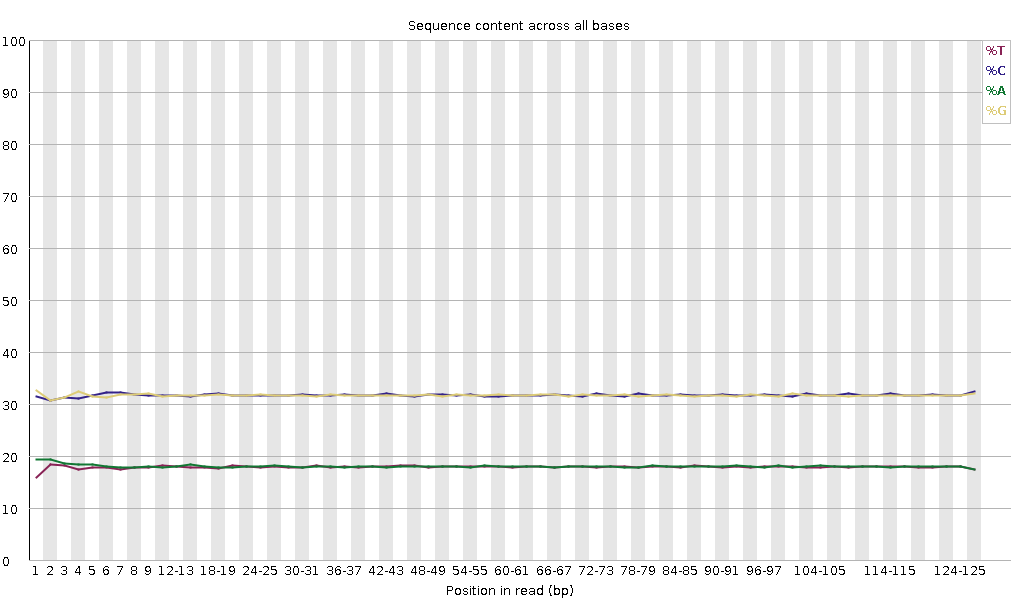
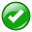
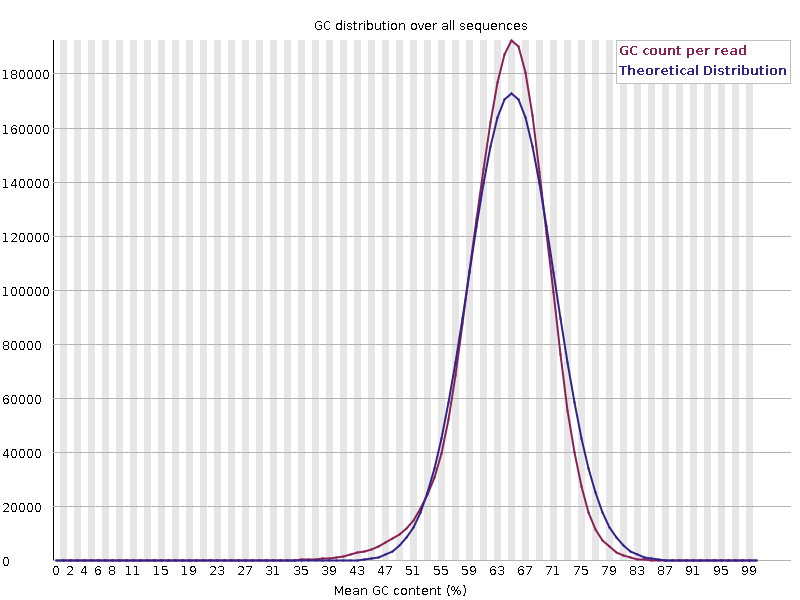
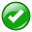
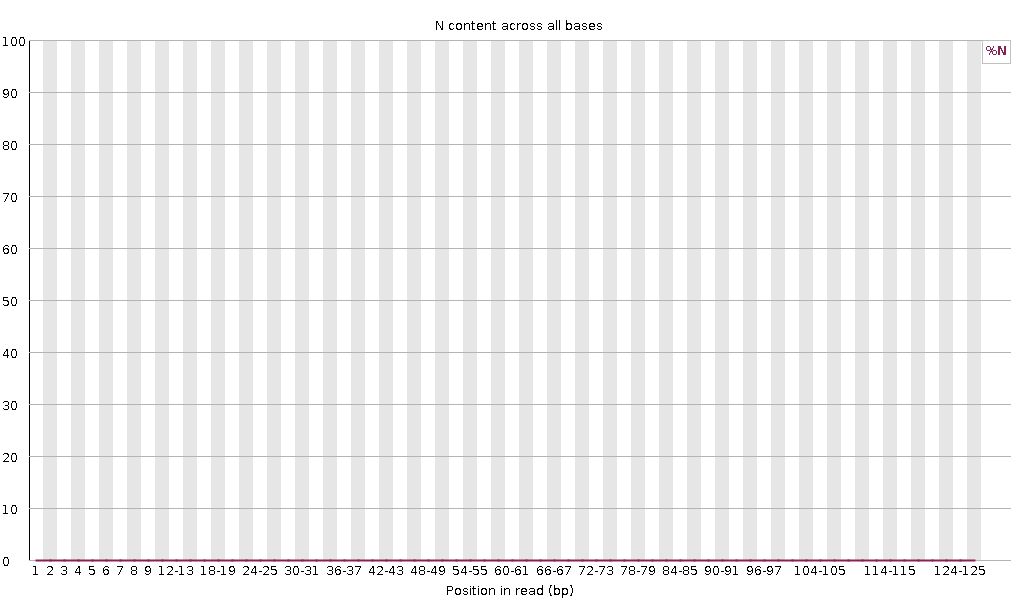
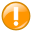
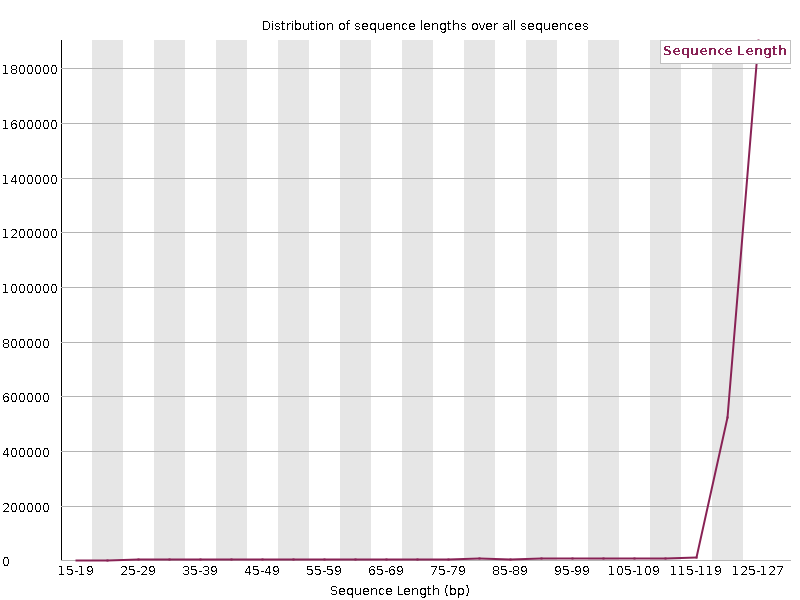
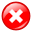
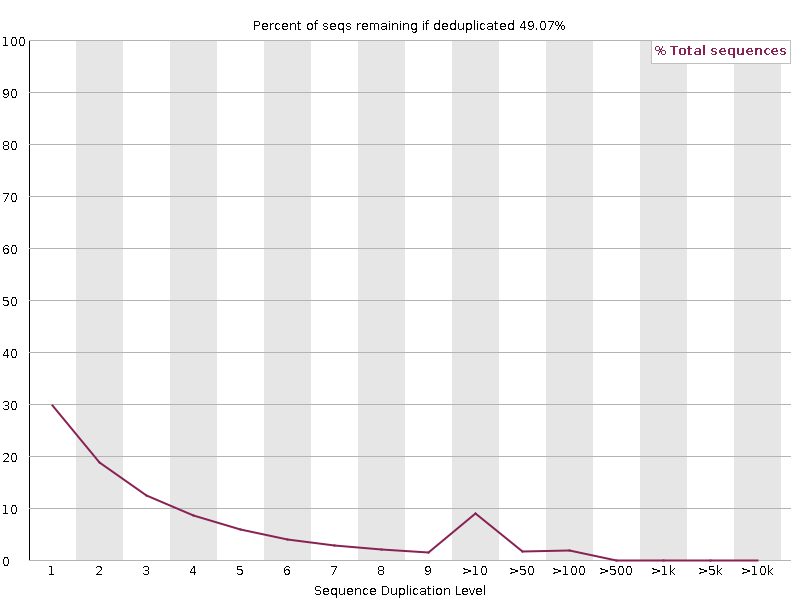
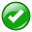
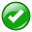
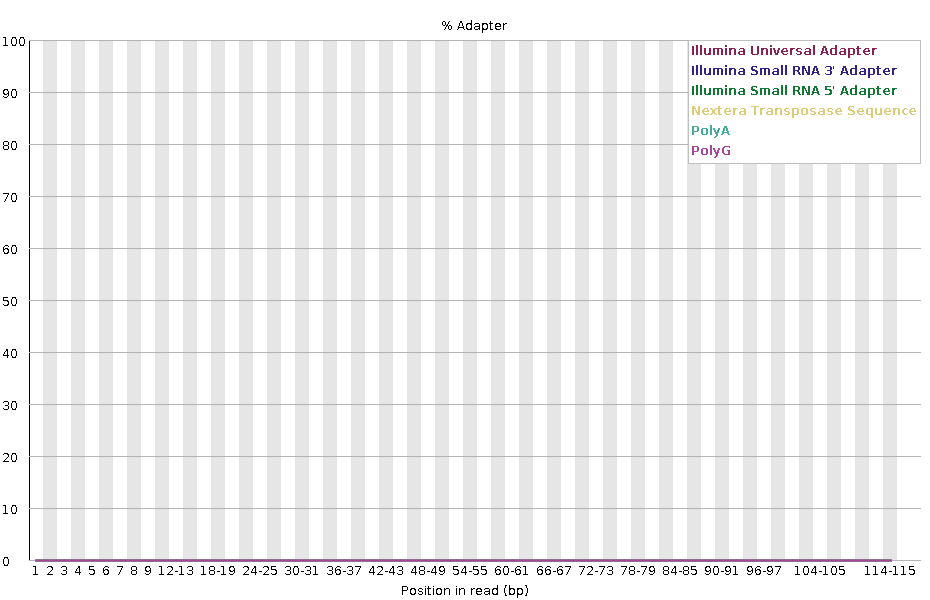

In [13]:
import os
from IPython.core.display import display, HTML

# Ask the user for the file name they want to display
file_name = input("Enter the name of the HTML file you want to display (include .html extension): ")

# Check if the file exists
if os.path.exists(file_name):
    # Open and read the HTML file
    with open(file_name, 'r') as file:
        html_content = file.read()
        display(HTML(html_content))  # Display the HTML content
else:
    print(f"File '{file_name}' not found. Please ensure the file exists in the current directory.")

**Run the Illumina assembler SPAdes using the --isolate option. This option is designed for cases where the reads originate from a single, pure isolate..**

Get Spades

In [14]:
#2022-10-21 Steven Tang
#!wget http://cab.spbu.ru/files/release3.9.0/SPAdes-3.9.0-Linux.tar.gz
#!tar -xzf SPAdes-3.9.0-Linux.tar.gz

#2023-09-15 Renald Legaspi
#Updated: Spades3.9 to 3.15 since that version no longer runs on colab because a different version of python is being implemented.
#Fix: No longer installs the Linux tarfile due to segment fault issue. Spades is now being compiled from source.
# !wget http://cab.spbu.ru/files/release3.15.5/SPAdes-3.15.5.tar.gz
# !tar -xzf SPAdes-3.15.5.tar.gz
# !cd SPAdes-3.15.5
# !./SPAdes-3.15.5/spades_compile.sh

#2023-09-18 Steven Tang
#Fix: Use precompiled SPAdes that works with Colab
!wget https://github.com/steventango/colab-spades/releases/download/v3.15.5/SPAdes-3.15.5-Colab.tar.gz
!tar -xzf SPAdes-3.15.5-Colab.tar.gz


from datetime import datetime
from google.colab import files
from pathlib import Path
import subprocess

--2025-11-13 23:52:11--  https://github.com/steventango/colab-spades/releases/download/v3.15.5/SPAdes-3.15.5-Colab.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/692978392/9c40bb17-156e-4e21-ae17-a8075db0d835?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-14T00%3A40%3A43Z&rscd=attachment%3B+filename%3DSPAdes-3.15.5-Colab.tar.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-13T23%3A40%3A09Z&ske=2025-11-14T00%3A40%3A43Z&sks=b&skv=2018-11-09&sig=s5Vaf2zy5IhG2gVxltHqpbVlbSCvgBlNK57%2BbXaTbts%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MzA3OTczMSwibmJmIjoxNzYzMDc3OTMxLCJwYXRoIjoicmVs

Run Spades

In [ ]:
# Tries to reduce the number of mismatches and short indels.
# Also runs MismatchCorrector: A post processing tool that uses BWA tool.
# Recommended mostly for small and/or low complexity genome.

#2022-10-21 Steven Tang
#careful_mode = True

#2023-09-15 Renald Legaspi
#Updated: Careful mode may cause the spades.py to crash due to insufficient RAM
careful_mode = False

#2023-09-15 Renald Legaspi
#Colab no longer implements python2; thus 'python /path/spades.py' is used instead of 'python2 /path/spades.py'
pe1_filename = "SRR30576374_1_val_1.fq.gz"
pe2_filename = "SRR30576374_2_val_2.fq.gz"

output_directory = f"{Path(pe1_filename).stem}_{Path(pe2_filename).stem}_{datetime.now().isoformat()}"

process = subprocess.run(
    f'python ./bin/spades.py --isolate -1 SRR30576374_1_val_1.fq.gz -2 SRR30576374_2_val_2.fq.gz -o spades_output',
    capture_output=True,
    text=True,
    shell=True
)

#print(process.stdout)
#print(process.stderr)

In [12]:
!spades.py --isolate -1 SRR30576374_1_val_1.fq.gz -2 SRR30576374_2_val_2.fq.gz -o spades_output

/bin/bash: line 1: spades.py: command not found


Your results are in spades_output. We will compare the results with long reads assembly

#Long Reads assembly

Fetch Pacbio HIFI sequences and run long read assembler - flye

In [ ]:
!wget https://zenodo.org/record/14018699/files/SRR30576370.fastq.gz

Run Quality Control for Long Reads

NanoPlot is a tool designed for quality control of Oxford Nanopore long reads. However, it can also be adapted for use with PacBio HiFi long reads to perform simple QC analysis.

In [ ]:
!NanoPlot -fastq SRR30576370.fastq.gz -o nanoplot_output

Filter reads shorter than 1 Kb

In [ ]:
!filtlong --min_length 1000 --keep_percent 90 SRR30576370.fastq.gz | gzip > filtered_SRR30576370.fastq.gz

Run QC again and check results

In [ ]:
!NanoPlot -fastq filtered_SRR30576370.fastq.gz -o filtered_nanoplot_output

Run Long-Read Assembler - Flye

Run the long-read assembler Flye using only a subset of reads that provide 50x coverage of the genome. This approach helps conserve computational resources. The coverage can be increased as needed based on specific requirements.

In [ ]:
!flye --asm-coverage 50 --pacbio-hifi filtered_SRR30576370.fastq.gz -o flye_results --genome-size 5000000

#Assembly stats and comparisions

Compare Both Assemblies Using quast

Evaluate metrics such as the number of contigs, genome size, N50.

In [ ]:
!mkdir assemblies/
!cp spades_output/contigs.fasta assemblies/spades_contigs.fasta
!cp flye_results/assembly.fasta assemblies/flye_contigs.fasta
!quast assemblies/spades_contigs.fasta assemblies/flye_contigs.fasta